In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from scipy import bet

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

**import stuff**

In [4]:
sensors = pd.read_csv('./raw_dim/sensors.csv')

In [5]:
equipments = pd.read_csv('./raw_dim/equipments.csv')

In [ ]:
# sensors = pd.read_excel('../Desktop/case.xlsx', sheet_name='sensors').iloc[:, 0:4]
# equipments = pd.read_excel('../Desktop/case.xlsx', sheet_name='equipments').iloc[:, 0:4]

In [6]:
equipments.name.unique()

array(['Gas turbine', 'Steam turbine', 'Heat steam generator',
       'Gas generator', 'Cooling A', 'Cooling B', 'Transformers A'],
      dtype=object)

In [7]:
sensors = sensors.merge(
    equipments.drop('plant_id', axis = 1), 
    on = 'equipment_id', 
    how='left').rename({'name_x':'sensor_name', 'name_y':'equipment_name'}, axis = 1)
sensors.sensor_name = sensors.sensor_name.str.rstrip('\t')

**checking some distributions**

<AxesSubplot:ylabel='Frequency'>

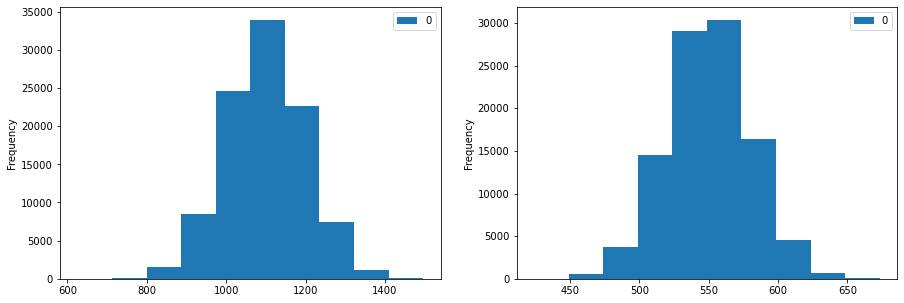

In [13]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
# gas turbine, Thermocouple
pd.DataFrame(np.random.normal(loc = 1_100, scale = 100, size = 100_000)).plot(kind='hist', ax = ax[0])
# Steam turbine, Thermocouple
pd.DataFrame(np.random.normal(loc = 550, scale = 30, size = 100_000)).plot(kind='hist', ax = ax[1])

**Vibration Sensor - Log normal**

In [14]:
mean_gas, std_gas = 3.0, 1.0
mean_steam, std_steam = 2.0, 0.7
# std 2 sigma 4 log-normal
sigma_gas = np.sqrt(np.log(1 + (std_gas / mean_gas) ** 2))
sigma_steam = np.sqrt(np.log(1 + (std_steam / mean_steam) ** 2))

<AxesSubplot:ylabel='Frequency'>

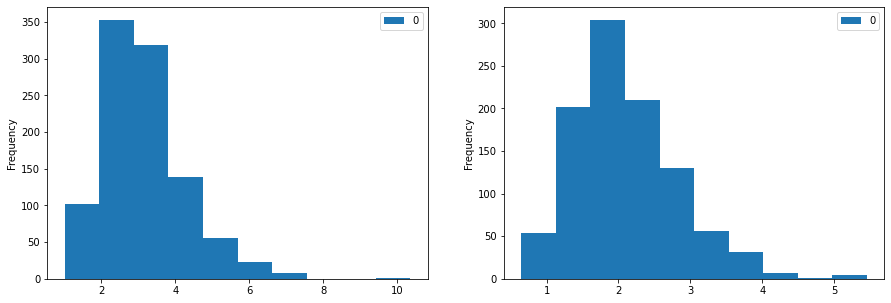

In [15]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
# gas turbine, Vibration Sensor
pd.DataFrame(np.random.lognormal(mean=np.log(mean_gas), sigma=sigma_gas, size=1000)).plot(kind='hist', ax = ax[0])
# steam turbine, Vibration Sensor
pd.DataFrame(np.random.lognormal(mean=np.log(mean_steam), sigma=sigma_steam, size=1000)).plot(kind='hist', ax = ax[1])

**Moisture Sensor, % Water Content - Beta dist**

<AxesSubplot:ylabel='Frequency'>

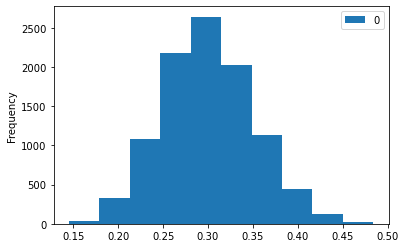

In [16]:
# Moisture Sensor
mean_moisture = 0.3  # mean in pct
std_moisture = 0.05  # std in percentage
# alpha and beta with mean and std
alpha = mean_moisture * ((mean_moisture * (1 - mean_moisture) / (std_moisture ** 2)) - 1)
beta_param = (1 - mean_moisture) * ((mean_moisture * (1 - mean_moisture) / (std_moisture ** 2)) - 1)
pd.DataFrame(np.random.beta(alpha, beta_param, size=10_000)).plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

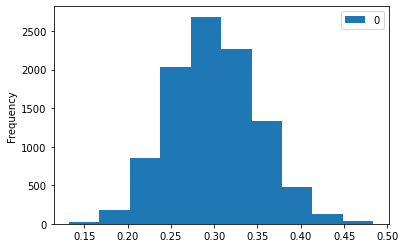

In [17]:
pd.DataFrame(np.random.beta(alpha, beta_param, size=10_000)).plot(kind='hist')

---

**dummy readings creation**

In [ ]:
# # range of dates
# rng = pd.bdate_range(start='2023-01-01',end='2024-01-01',freq='12h')
# # week days
# rng = rng[rng.dayofweek < 5]
# rng = rng[0:-1]

In [18]:
# range of dates
rng = pd.bdate_range(start='2024-01-01',end='2024-04-01',freq='12h')
# week days
rng = rng[rng.dayofweek < 5]
rng = rng[0:-1]

In [19]:
print(len(rng))
rng[0:2], rng[-2:]

130


(DatetimeIndex(['2024-01-01 00:00:00', '2024-01-01 12:00:00'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['2024-03-29 00:00:00', '2024-03-29 12:00:00'], dtype='datetime64[ns]', freq=None))

In [20]:
n = len(rng)

In [21]:
def celsius_gen(ls, mn, std):
    n = len(rng)
    ls_concat = [[sens_id] * n for sens_id in ls]
    dates_ls = rng.tolist() * len(ls)
    vals = np.random.normal(loc = mn, scale = std, size = len(dates_ls))
    df_aux = pd.DataFrame(
        data=[dates_ls, np.concatenate(ls_concat), vals]).T.rename(
        {0:'timestamp', 1:'sensor_id', 2:'value'}, axis = 1)
    df_aux.value = df_aux.value.astype(float).round(2)
    return df_aux
def ls_gen(filters, mn, std):
    ls_aux = sensors[filters].sensor_id.tolist()
    return celsius_gen(ls_aux, mn, std)

In [22]:
filter_0 = (sensors.equipment_name == 'Gas turbine') & (sensors.sensor_name == 'Thermocouple')
stats_0 = [1_100, 100]
filter_1 = (sensors.equipment_name == 'Steam turbine') & (sensors.sensor_name == 'Thermocouple')
stats_1 = [550, 30]
filter_2 = (sensors.equipment_name == 'Heat steam generator') & (sensors.sensor_name == 'Temperature Sensor')
stats_2 = [450, 25]
filter_3 = (sensors.equipment_name == 'Gas generator') & (sensors.sensor_name == 'Temperature Sensor')
stats_3 = [950, 50]
filter_4 = (sensors.equipment_name == 'Cooling A') & (sensors.sensor_name == 'Coolant temperature')
stats_4 = [85, 5]
filter_5 = (sensors.equipment_name == 'Cooling B') & (sensors.sensor_name == 'Coolant temperature')
stats_5 = [60, 4]
filter_6 = (sensors.equipment_name == 'Transformers A') & (sensors.sensor_name == 'Oil Temperature Sensor')
stats_6 = [75, 5]
filter_7 = (sensors.equipment_name == 'Heat steam generator') & (sensors.sensor_name == 'Voltage Sensor')
stats_7 = [230, 10]
filter_8 = (sensors.equipment_name == 'Gas generator') & (sensors.sensor_name == 'Voltage Sensor')
stats_8 = [400, 15]
filter_9 = (sensors.equipment_name == 'Cooling A') & (sensors.sensor_name == 'Pressure Sensor')
stats_9 = [2.5, 0.3]
filter_10 = (sensors.equipment_name == 'Cooling B') & (sensors.sensor_name == 'Pressure Sensor')
stats_10 = [1.8, 0.2]

# log normal
filter_11 = (sensors.equipment_name == 'Gas turbine') & (sensors.sensor_name == 'Vibration Sensor')
stats_11 = [3, 1]
filter_12 = (sensors.equipment_name == 'Steam turbine') & (sensors.sensor_name == 'Vibration Sensor')
stats_12 = [2, 0.7]

# beta
filter_13 = (sensors.equipment_name == 'Transformers A') & (sensors.sensor_name == 'Moisture Sensor')
stats_13 = [0.3, 0.05]

In [ ]:
# print(sensors[filter_0].sensor_id.duplicated().sum(), sum(filter_0))
# sensors[filter_0].head()

In [23]:
# generation of normal dist dummies
df_0 = ls_gen(filter_0, stats_0[0], stats_0[1])
df_1 = ls_gen(filter_1, stats_1[0], stats_1[1])
df_2 = ls_gen(filter_2, stats_2[0], stats_2[1])
df_3 = ls_gen(filter_3, stats_3[0], stats_3[1])
df_4 = ls_gen(filter_4, stats_4[0], stats_4[1])
df_5 = ls_gen(filter_5, stats_5[0], stats_5[1])
df_6 = ls_gen(filter_6, stats_6[0], stats_6[1])
df_7 = ls_gen(filter_7, stats_7[0], stats_7[1])
df_8 = ls_gen(filter_8, stats_8[0], stats_8[1])
df_9 = ls_gen(filter_9, stats_9[0], stats_9[1])
df_10 = ls_gen(filter_10, stats_10[0], stats_10[1])

In [24]:
norm_dist_frames = [df_0, df_1 , df_2 ,df_3 ,df_4 ,df_5 ,df_6 ,df_7 ,df_8 ,df_9 ,df_10]

In [25]:
# std 2 sigma 4 log-normal
sigma_gas = np.sqrt(np.log(1 + (std_gas / mean_gas) ** 2))
sigma_steam = np.sqrt(np.log(1 + (std_steam / mean_steam) ** 2))

In [26]:
def log_normal_gen(ls, mn, sigma_std):
    n = len(rng)
    ls_concat = [[sens_id] * n for sens_id in ls]
    dates_ls = rng.tolist() * len(ls)
    vals = np.random.lognormal(mean=np.log(mn), sigma=sigma_std, size=len(dates_ls)) 
    df_aux = pd.DataFrame(
        data=[dates_ls, np.concatenate(ls_concat), vals]).T.rename(
        {0:'timestamp', 1:'sensor_id', 2:'value'}, axis = 1)
    df_aux.value = df_aux.value.astype(float).round(2)
    return df_aux
    
def log_normal_ls_gen(filters, mn, std):
    ls_aux = sensors[filters].sensor_id.tolist()
    return log_normal_gen(ls_aux, mn, std)

In [27]:
# generation of log normal dist dummies
df_11 = log_normal_ls_gen(filter_11, stats_11[0], sigma_gas)
df_12 = log_normal_ls_gen(filter_12, stats_12[0], sigma_steam)

In [28]:
# Moisture Sensor
mean_moisture = 0.3  # mean in pct
std_moisture = 0.05  # std in percentage
# alpha and beta with mean and std
alpha = mean_moisture * ((mean_moisture * (1 - mean_moisture) / (std_moisture ** 2)) - 1)
beta_param = (1 - mean_moisture) * ((mean_moisture * (1 - mean_moisture) / (std_moisture ** 2)) - 1)

In [29]:
def beta_gen(ls):
    n = len(rng)
    ls_concat = [[sens_id] * n for sens_id in ls]
    dates_ls = rng.tolist() * len(ls)
    vals = np.random.beta(alpha, beta_param, size=len(dates_ls))
    df_aux = pd.DataFrame(
        data=[dates_ls, np.concatenate(ls_concat), vals]).T.rename(
        {0:'timestamp', 1:'sensor_id', 2:'value'}, axis = 1)
    df_aux.value = df_aux.value.astype(float).round(2)
    return df_aux
    
def beta_ls_gen(filters):
    ls_aux = sensors[filters].sensor_id.tolist()
    return beta_gen(ls_aux)

In [30]:
# generation of beta dist dummies
df_13 = beta_ls_gen(filter_13)

<AxesSubplot:ylabel='Frequency'>

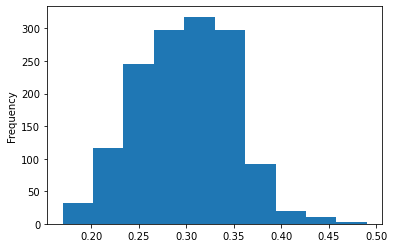

In [31]:
df_13.value.plot(kind='hist')

In [32]:
df = pd.concat(norm_dist_frames + [df_11, df_12, df_13], axis = 0)

In [37]:
df.head()

,timestamp,sensor_id,value
0,2024-01-01 00:00:00,3000001,1050.94
1,2024-01-01 12:00:00,3000001,1026.39
2,2024-01-02 00:00:00,3000001,1129.72
3,2024-01-02 12:00:00,3000001,1258.36
4,2024-01-03 00:00:00,3000001,985.00


In [33]:
df.timestamp.describe()

count                   56940
unique                    130
top       2024-01-10 12:00:00
freq                      438
first     2024-01-01 00:00:00
last      2024-03-29 12:00:00
Name: timestamp, dtype: object

In [34]:
df.sensor_id.nunique()

438

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56940 entries, 0 to 1429
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  56940 non-null  datetime64[ns]
 1   sensor_id  56940 non-null  object        
 2   value      56940 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.7+ MB


In [36]:
df.to_csv('./sensor_readings_2024_q1.csv', index=None)

---